In [ ]:
%tensorflow_version 1.x
import numpy as np
import pandas as pd
import h5py
import skimage
import matplotlib.pyplot as plt
import sys
%matplotlib inline
import PIL
import os
import tensorflow as tf
from keras.models import Model
from keras import optimizers
from keras.applications.vgg16 import VGG16, preprocess_input
from sklearn.metrics import f1_score,accuracy_score
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten
from pathlib import Path
import numpy as np

TensorFlow 1.x selected.


Using TensorFlow backend.


In [ ]:
import h5py
import skimage
import matplotlib.pyplot as plt
import sys

Visualize data

['category', 'category_names', 'images']
10099
101
10099
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[[ 66  20   5]
  [ 63  17   2]
  [ 62  19   3]
  ...
  [ 55  15   3]
  [ 58  16   4]
  [ 59  17   5]]

 [[ 65  18   2]
  [ 65  18   2]
  [ 64  18   2]
  ...
  [ 83  21   8]
  [ 85  21   9]
  [ 84  20   8]]

 [[ 61  14   0]
  [ 64  16   2]
  [ 59  16   0]
  ...
  [ 91  20   0]
  [ 90  19   0]
  [ 88  15   0]]

 ...

 [[197   4   0]
  [196   4   1]
  [181   7   0]
  ...
  [ 35   6   2]
  [ 33   4   0]
  [ 45   6   0]]

 [[203   4   0]
  [197   2   0]
  [196  11   6]
  ...
  [ 59  12   6]
  [ 72  12   4]
  [ 75   8   0]]

 [[208   3   0]
  [202   4   1]
  [198   3   0]
  ...
  [ 70  10   0]
  [104  20   9]
  [102  14   0]]]


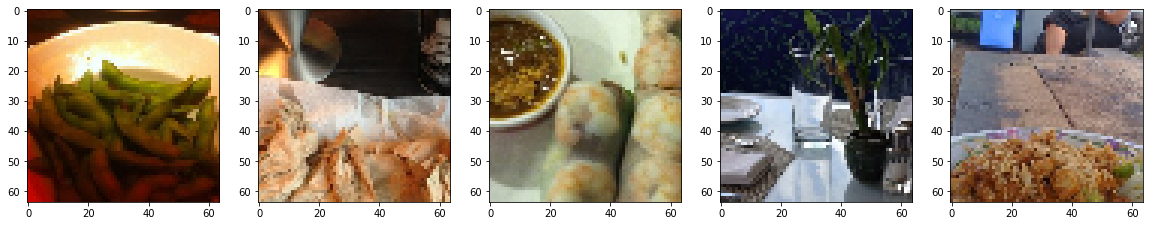

In [ ]:
f=h5py.File('/content/drive/MyDrive/AML project - Fall 2021/food_c101_n10099_r64x64x3.h5','r')
print(list(f.keys()))
print(len(f["category"]))
print(len(f["category_names"]))
print(len(f["images"]))
# Print Sample Pictures
print([int(i) for i in f["category"][0]])
print(f["images"][0])
fig=plt.figure(figsize=(20,20))
n=5
col=5
for i in range(n):
    ax=fig.add_subplot(n/col,col,i+1)
    #ax.set_title(f["category_names"][i].decode())
    ax.imshow(f["images"][i])
#plt.savefig("./sample_show_64x64")

Compile model with non weights

In [ ]:
model = VGG16(weights=None,input_shape=(64,64,3),classes=101)
# Normalize data
x=np.array(f["images"])/255
# classes of images
y=np.array([[int(i) for i in f["category"][j]] for j in range(len(f["category"]))])
#model.compile(loss='categorical_crossentropy',optimizer=optimizers.rmsprop(lr=0.0001, decay=1e-6))
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=0.00008, beta_1=0.9, beta_2=0.97, epsilon=1e-7))

In [ ]:
from sklearn.model_selection import train_test_split
train_x,test_x, train_y, test_y = train_test_split(x,y,test_size = 0.2)
model.fit(train_x,train_y,batch_size=128,epochs=30,shuffle=False)

pred_y=model.predict(test_x)
zero_y=np.zeros(pred_y.shape)
argmax_lst=np.argmax(pred_y,axis=1)
for i in range(len(argmax_lst)):
    zero_y[i][argmax_lst[i]]=1
pred_y=zero_y

Epoch 1/30
8079/8079 [==============================] - 23s 3ms/step - loss: 2.5142
Epoch 2/30
8079/8079 [==============================] - 22s 3ms/step - loss: 1.1624
Epoch 3/30
8079/8079 [==============================] - 22s 3ms/step - loss: 0.3943
Epoch 4/30
8079/8079 [==============================] - 22s 3ms/step - loss: 0.3758
Epoch 5/30
8079/8079 [==============================] - 22s 3ms/step - loss: 0.2853
Epoch 6/30
8079/8079 [==============================] - 22s 3ms/step - loss: 0.2424
Epoch 7/30
8079/8079 [==============================] - 22s 3ms/step - loss: 0.2058
Epoch 8/30
8079/8079 [==============================] - 22s 3ms/step - loss: 0.1967
Epoch 9/30
8079/8079 [==============================] - 22s 3ms/step - loss: 0.1852
Epoch 10/30
8079/8079 [==============================] - 22s 3ms/step - loss: 0.1812
Epoch 11/30
8079/8079 [==============================] - 22s 3ms/step - loss: 0.1564
Epoch 12/30
8079/8079 [==============================] - 22s 3ms/step - lo

Accuracy of vgg16 model 1 with no weights

In [ ]:
from sklearn.metrics import accuracy_score
print("Acc-Score:",accuracy_score(np.array(test_y),np.array(pred_y)))

Acc-Score: 0.20445544554455444
